# Massachusetts Energy Data
**This data is from the US Energy Information Administration from their Residential Energy Consumption Survey (RECS)**
This specific data set was collected in 2015, and is the 14th iteration of the RECS program that started in 1978. The data is collected from over 5,600 households and is extrapolated to represent 118.2 million Massachusetts households.

The raw data can be found here: https://www.eia.gov/state/?sid=MA

I found a review of the data by a separate source that I used as a bias checker to see if there were any errors in the data that I should be aware of. It included some of the methodology, and examples of smaller errors that I don't think influence the ethicallity of the study.

https://www.aeaweb.org/forum/1597/energy-economists-invites-comment-residential-consumption

I also read the file provided by the EIA that was recommended to read for users of the data. 

The pdf file can be found here: https://www.eia.gov/consumption/residential/data/2015/pdf/microdata_v3.pdf

## Notes from the file
Data provides estimates for energy consumption in housinng units. The data also allows for separation estimation for Census regions and divisions. 

A case's weight represents the number of households that particular case represents. (NWEIGHT)

_The text emphasized the consistency and accuracy of the random sampling and the mechanisms that allowed for extrapolation and RSE._

RSE is the relative standard error on a scale of 0 to 100.

I found a corresponding "layout" file in the 2009 data set that I cross referenced to find what each column referred to. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets 
from sklearn.datasets import fetch_openml 
import matplotlib.pyplot as plt
import seaborn as sns
import csv

plt.style.use("fivethirtyeight")

file = '/Users/hannahono/PycharmProjects/MassData/recs2015_public_v4.csv'
raw_df = pd.read_csv(file)

In [2]:
raw_df.keys()

Index(['DOEID', 'REGIONC', 'DIVISION', 'METROMICRO', 'UATYP10', 'TYPEHUQ',
       'ZTYPEHUQ', 'CELLAR', 'ZCELLAR', 'BASEFIN',
       ...
       'ZELAMOUNT', 'NGXBTU', 'PERIODNG', 'ZNGAMOUNT', 'FOXBTU', 'PERIODFO',
       'ZFOAMOUNT', 'LPXBTU', 'PERIODLP', 'ZLPAMOUNT'],
      dtype='object', length=759)

In [3]:
raw_df.describe()

,DOEID,REGIONC,DIVISION,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,ATTIC,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
count,5686.000000,5686.000000,5686.000000,5686.000000,5686.0,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,...,5686.000000,3304.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5.686000e+03,5686.000000,5686.000000
mean,12843.500000,2.760816,5.670243,2.596025,0.0,-0.205593,-0.505276,-1.199261,-1.381815,-0.111854,...,0.109040,100.088868,0.181674,-0.731094,137.441423,-1.738305,-1.872318,9.133000e+01,-1.479071,-1.748505
std,1641.551147,1.004187,2.842655,1.164641,0.0,1.134775,0.880288,1.235166,0.933693,1.187953,...,0.311716,4.437933,2.197037,1.117215,0.142739,1.197667,0.558504,2.842421e-14,1.663040,0.767910
min,10001.000000,1.000000,1.000000,1.000000,0.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,83.340000,-2.000000,-2.000000,135.000000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
25%,11422.250000,2.000000,3.000000,2.000000,0.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,99.050000,-2.000000,-2.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
50%,12843.500000,3.000000,5.000000,2.000000,0.0,0.000000,0.000000,-2.000000,-2.000000,0.000000,...,0.000000,101.145000,1.000000,0.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
75%,14264.750000,4.000000,8.000000,3.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,102.780000,1.000000,0.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
max,15686.000000,4.000000,10.000000,5.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,107.720000,5.000000,1.000000,137.450000,5.000000,1.000000,9.133000e+01,5.000000,1.000000


These are some data columns I pulled from the data set using the file from the 2009 data set that I thought would be interesting to compare. However, I still needed to figure out what each number corresponded to. I did this with some additional research digging around in similar data sets to make educated assumptions.


In [4]:
print(raw_df["KOWNRENT"])
# Owned, Rented, Occupied without rent
print(raw_df["WALLTYPE"])
print(raw_df["TOTROOMS"])
print(raw_df["OUTLET"])
# Outlet within 20 feet of vehicle parking
print(raw_df["DWASHUSE"])
# Frequency dishwasher used
print(raw_df["INTERNET"])
print(raw_df["EQUIPM"])
# Type of main space heating equpiment used
print(raw_df["TEMPHOME"])
# Temperature when someone is home during the day (winter)
print(raw_df["TEMPGONE"])
# Temperature when no on is home during the day (winter)
print(raw_df["ELWARM"])
# Electricity used for space heating
print(raw_df["UGWARM"])
# Natural gas used for space heating
print(raw_df["LPWARM"])
# Propane used for space heating
print(raw_df["EDUCATION"])
print(raw_df["NHSLDMEM"])
# Number of household members
print(raw_df["HHAGE"])
# Age of household members
print(raw_df["MONEYPY"])
# Gross household income
print(raw_df["KWH"])
# Total Site Electricity usage, in kilowatt-hours
print(raw_df["HOUSEHOLDER_RACE"])
print(raw_df["TOTALDOLSPH"])
# Total cost for space heating, in whole dollars

0       1
1       1
2       1
3       1
4       1
       ..
5681    2
5682    2
5683    2
5684    1
5685    2
Name: KOWNRENT, Length: 5686, dtype: int64
0       4
1       3
2       2
3       3
4       1
       ..
5681    1
5682    3
5683    1
5684    1
5685    3
Name: WALLTYPE, Length: 5686, dtype: int64
0       7
1       4
2       9
3       7
4       6
       ..
5681    3
5682    5
5683    3
5684    5
5685    3
Name: TOTROOMS, Length: 5686, dtype: int64
0       1
1       0
2       1
3       1
4       1
       ..
5681   -2
5682    0
5683   -2
5684    1
5685    0
Name: OUTLET, Length: 5686, dtype: int64
0       6
1      -2
2       7
3      -2
4      -2
       ..
5681   -2
5682   -2
5683   -2
5684    2
5685    3
Name: DWASHUSE, Length: 5686, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
5681    0
5682    1
5683    0
5684    1
5685    1
Name: INTERNET, Length: 5686, dtype: int64
0       3
1       9
2       3
3       3
4       3
       ..
5681    3
5682    7
5683

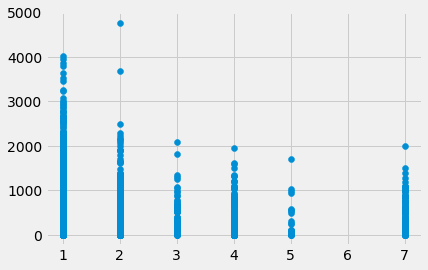

In [5]:
plt.scatter(raw_df['HOUSEHOLDER_RACE'],raw_df['TOTALDOLSPH'])

(array([4642.,  591.,    0.,   67.,    0.,  242.,   22.,    0.,    0.,
         122.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

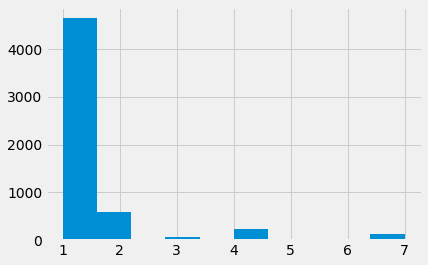

In [6]:
plt.hist(raw_df['HOUSEHOLDER_RACE'])
# 1: white alone
# 2: black or african american alone
# 3: indigenous
# 4: asian alone
# 5: other race
# 6: two or more races

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

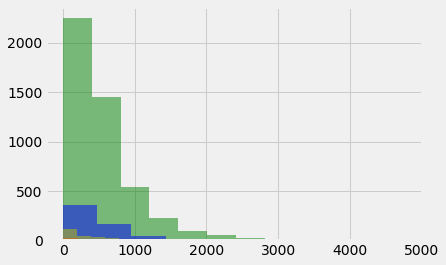

In [7]:
# This histogram plots the dollars spent on space heating in relation to race. Above is the context for what race each number corresponds to.
# This graph was not too helpful to me because the proportion of white householders to householders of other races was so large, it could not be compared effectively. 

plt.hist(raw_df[raw_df["HOUSEHOLDER_RACE"]==1]["TOTALDOLSPH"], alpha=0.5, color='g')
plt.hist(raw_df[raw_df["HOUSEHOLDER_RACE"]==2]["TOTALDOLSPH"], alpha=0.5, color='b')
plt.hist(raw_df[raw_df["HOUSEHOLDER_RACE"]==3]["TOTALDOLSPH"], alpha=0.5, color='r')
plt.hist(raw_df[raw_df["HOUSEHOLDER_RACE"]==4]["TOTALDOLSPH"], alpha=0.5, color='y')
plt.hist(raw_df[raw_df["HOUSEHOLDER_RACE"]==5]["TOTALDOLSPH"], alpha=0.5, color='orange')
plt.hist(raw_df[raw_df["HOUSEHOLDER_RACE"]==6]["TOTALDOLSPH"], alpha=0.5, color='purple')

(array([3.277e+03, 1.635e+03, 4.820e+02, 1.680e+02, 8.600e+01, 2.100e+01,
        8.000e+00, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([   0.   ,  476.666,  953.332, 1429.998, 1906.664, 2383.33 ,
        2859.996, 3336.662, 3813.328, 4289.994, 4766.66 ]),
 <BarContainer object of 10 artists>)

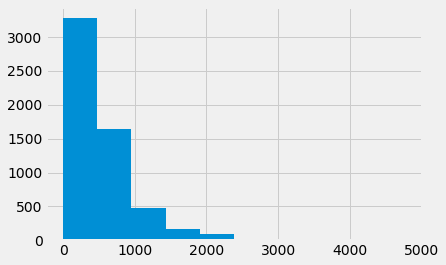

In [8]:
plt.hist(raw_df['TOTALDOLSPH'])

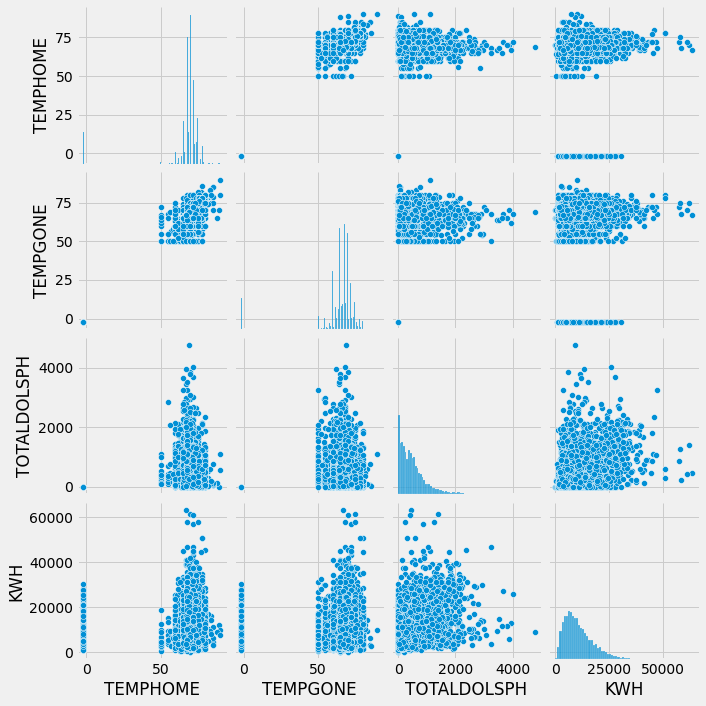

In [9]:
df_fewer_columns = raw_df[["TEMPHOME","TEMPGONE","TOTALDOLSPH","KWH"]]


sns.pairplot(df_fewer_columns);

(array([ 90., 133.,  86.,  33.,  21.,   7.,   2.,   1.,   0.,   1.]),
 array([  10.14 ,  485.792,  961.444, 1437.096, 1912.748, 2388.4  ,
        2864.052, 3339.704, 3815.356, 4291.008, 4766.66 ]),
 <BarContainer object of 10 artists>)

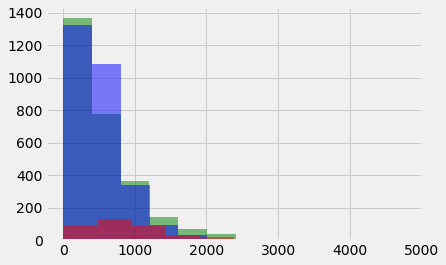

In [10]:
plt.hist(raw_df[raw_df["ELWARM"]==1]["TOTALDOLSPH"], alpha=0.5, color='g')
plt.hist(raw_df[raw_df["UGWARM"]==1]["TOTALDOLSPH"], alpha=0.5, color='b')
plt.hist(raw_df[raw_df["LPWARM"]==1]["TOTALDOLSPH"], alpha=0.5, color='r')

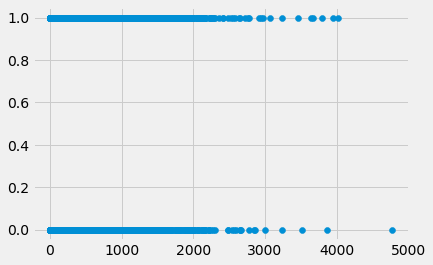

In [11]:
plt.scatter(raw_df["TOTALDOLSPH"], raw_df["ELWARM"])

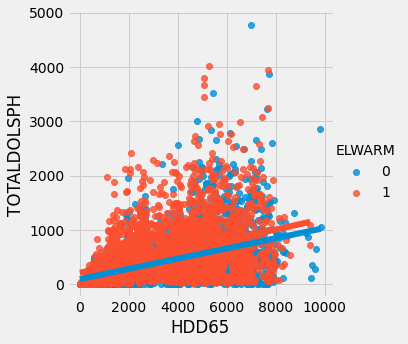

In [12]:
sns.lmplot(data=raw_df, x="HDD65", y="TOTALDOLSPH", hue="ELWARM")
# This graph compares the heating degree days to the total price of space heating. Unsuprisingly, the more heating the 
# residence required, the more expensive it was.
# I chose specifically to use space heating for the below graphs for consistency. Also, space heating is a necessity especially in colder weather.
# Electricity used for space heating did not seem to have a large impact on price.

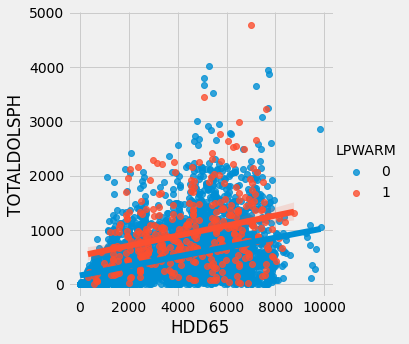

In [13]:
sns.lmplot(data=raw_df, x="HDD65", y="TOTALDOLSPH", hue="LPWARM")
# This is the same graph as above, but looking at propane usage for space heating. 
# It seems that propane is more expensive to use for heating than other energy sources on average

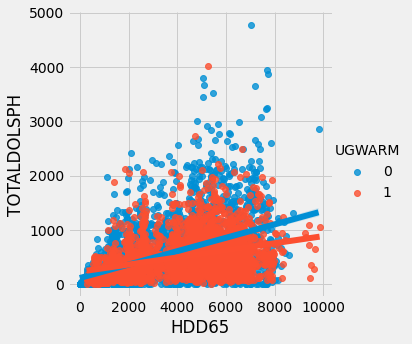

In [14]:
sns.lmplot(data=raw_df, x="HDD65", y="TOTALDOLSPH", hue="UGWARM")
# Again, this is the same graph but looking at natural gas for heating. 
# It seems that maybe the initial cost of natural gas for space heating is high, but increasing the number of heating days does not increase price as much as other energy sources

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 94.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

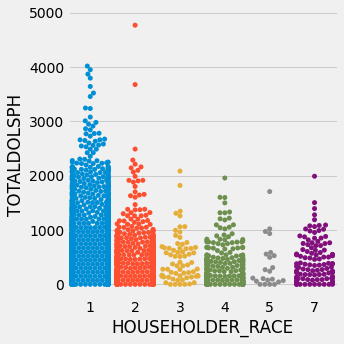

In [15]:
sns.catplot(data=raw_df, kind="swarm", x="HOUSEHOLDER_RACE", y="TOTALDOLSPH")

For some reason, using the "swarm" function to more clearly see the categories (the data points will not overlap) seemed to take too long.

The stripplot method worked better, but because there are not the same number of data points in each category, it is difficult to tell what the distribution is like. 

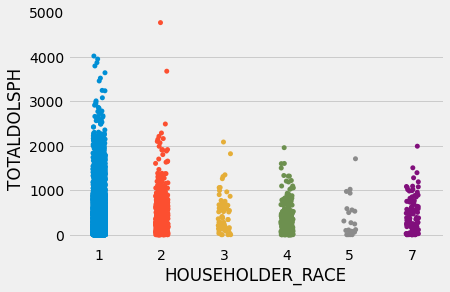

In [16]:
ax = sns.stripplot(x="HOUSEHOLDER_RACE", y="TOTALDOLSPH", data=raw_df)
# I wanted to see if race had any correlation to the cost spent on space heating. Thus, I used a stripplot so that I could also see the concentration of data points.

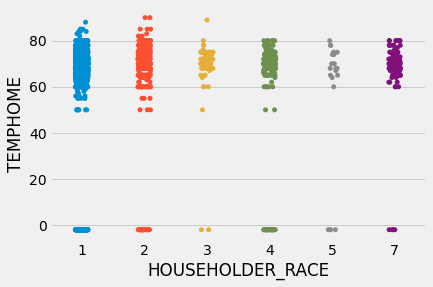

In [18]:
ax = sns.stripplot(x="HOUSEHOLDER_RACE", y="TEMPHOME", data=raw_df)
# I wonder what the data points at temperature 0 are. Perhaps the data was not collected or the house is not in use so there is no space heating. I will find this out later.

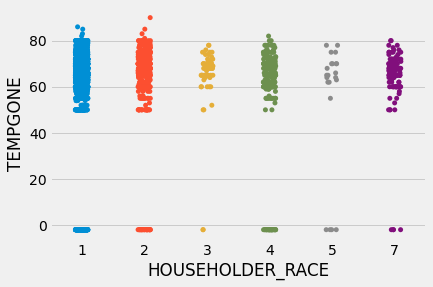

In [20]:
ax = sns.stripplot(x="HOUSEHOLDER_RACE", y="TEMPGONE", data=raw_df)
# The temphome and tempgone graphs generally look pretty similar. On average, the tempgone is slightly lower that the temphome.
# This makes sense because people tend not to heat their houses when they don't need to to save energy and money.
# I wonder if the difference between temphome and tempgone would be greater in lower income households because they cannot heat their home when they are not there.

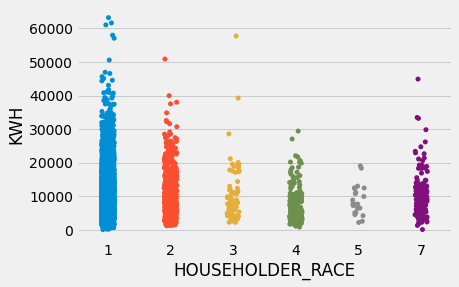

In [21]:
ax = sns.stripplot(x="HOUSEHOLDER_RACE", y="KWH", data=raw_df)
# I can't tell if the this graph shows that white householders use more energy, or have more outliers that use a lot of energy, or if there is simply just a larger population of white householders.
# It does seem like Asian householders have fewer outliers that use significantly more energy. It would be interesting to see if this was related to income or region or cultural differences.

In [29]:
race_df = raw_df[raw_df["HOUSEHOLDER_RACE"]==1]
race_df.describe()

,DOEID,REGIONC,DIVISION,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,ATTIC,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
count,4642.000000,4642.000000,4642.000000,4642.000000,4642.0,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,...,4642.000000,2691.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.00000,4.642000e+03,4642.000000,4642.000000
mean,12843.846187,2.728781,5.604265,2.504955,0.0,-0.114606,-0.444851,-1.119561,-1.320767,-0.029729,...,0.098664,99.867061,0.128393,-0.745799,137.440549,-1.722749,-1.86299,9.133000e+01,-1.429772,-1.724041
std,1640.197626,1.018630,2.863031,1.103010,0.0,1.107167,0.843033,1.268232,0.957104,1.150204,...,0.298243,4.499409,2.134332,1.104538,0.149572,1.218278,0.57358,2.842477e-14,1.727604,0.798822
min,10001.000000,1.000000,1.000000,1.000000,0.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,83.340000,-2.000000,-2.000000,135.000000,-2.000000,-2.00000,9.133000e+01,-2.000000,-2.000000
25%,11434.250000,2.000000,3.000000,2.000000,0.0,0.000000,0.000000,-2.000000,-2.000000,0.000000,...,0.000000,98.760000,-2.000000,-2.000000,137.450000,-2.000000,-2.00000,9.133000e+01,-2.000000,-2.000000
50%,12834.500000,3.000000,5.000000,2.000000,0.0,0.000000,0.000000,-2.000000,-2.000000,0.000000,...,0.000000,100.940000,1.000000,0.000000,137.450000,-2.000000,-2.00000,9.133000e+01,-2.000000,-2.000000
75%,14264.750000,4.000000,8.000000,3.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,102.710000,1.000000,0.000000,137.450000,-2.000000,-2.00000,9.133000e+01,-2.000000,-2.000000
max,15685.000000,4.000000,10.000000,5.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,107.720000,5.000000,1.000000,137.450000,5.000000,1.00000,9.133000e+01,5.000000,1.000000


In [30]:
race_df = raw_df[raw_df["HOUSEHOLDER_RACE"]==2]
race_df.describe()

,DOEID,REGIONC,DIVISION,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,ZBASEFIN,ATTIC,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
count,591.000000,591.000000,591.000000,591.000000,591.0,591.000000,591.000000,591.000000,591.000000,591.000000,...,591.000000,310.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02,591.000000,591.000000
mean,12855.472081,2.774958,5.306261,3.060914,0.0,-0.700508,-0.839255,-1.607445,-1.697124,-0.551607,...,0.147208,101.441000,0.191201,-0.800338,137.445854,-1.813875,-1.918782,9.133000e+01,-1.725888,-1.869712
std,1627.092326,0.797315,2.185300,1.347821,0.0,1.165892,1.003155,0.957510,0.728110,1.302004,...,0.354613,3.786128,2.461705,1.189246,0.100780,1.099712,0.476750,2.844579e-14,1.257920,0.574851
min,10015.000000,1.000000,1.000000,1.000000,0.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,84.370000,-2.000000,-2.000000,135.000000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
25%,11464.000000,3.000000,5.000000,2.000000,0.0,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,100.610000,-2.000000,-2.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
50%,12896.000000,3.000000,5.000000,2.000000,0.0,0.000000,0.000000,-2.000000,-2.000000,0.000000,...,0.000000,102.310000,1.000000,0.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
75%,14176.500000,3.000000,6.000000,5.000000,0.0,0.000000,0.000000,-2.000000,-2.000000,1.000000,...,0.000000,103.330000,1.000000,0.000000,137.450000,-2.000000,-2.000000,9.133000e+01,-2.000000,-2.000000
max,15686.000000,4.000000,10.000000,5.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,107.640000,5.000000,1.000000,137.450000,5.000000,1.000000,9.133000e+01,5.000000,1.000000


I am working on trying to isolate columns to describe the differences

## Additional Resources 
https://hub.packtpub.com/python-data-stack/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
https://numpy.org/doc/stable/user/absolute_beginners.html
https://seaborn.pydata.org/generated/seaborn.stripplot.html
https://www.eia.gov/state/?sid=MA
https://www.aeaweb.org/forum/1597/energy-economists-invites-comment-residential-consumption